In [7]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler




In [9]:

# 2. Cargar datos
data = pd.read_csv("winequality-red.csv")
print("Primeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [11]:

# 3. Análisis exploratorio de datos
print("\nInformación del dataset:")
print(data.info())

print("\nValores nulos por columna:")
print(data.isnull().sum())

print("\nEstadísticas descriptivas:")
print(data.describe())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid    

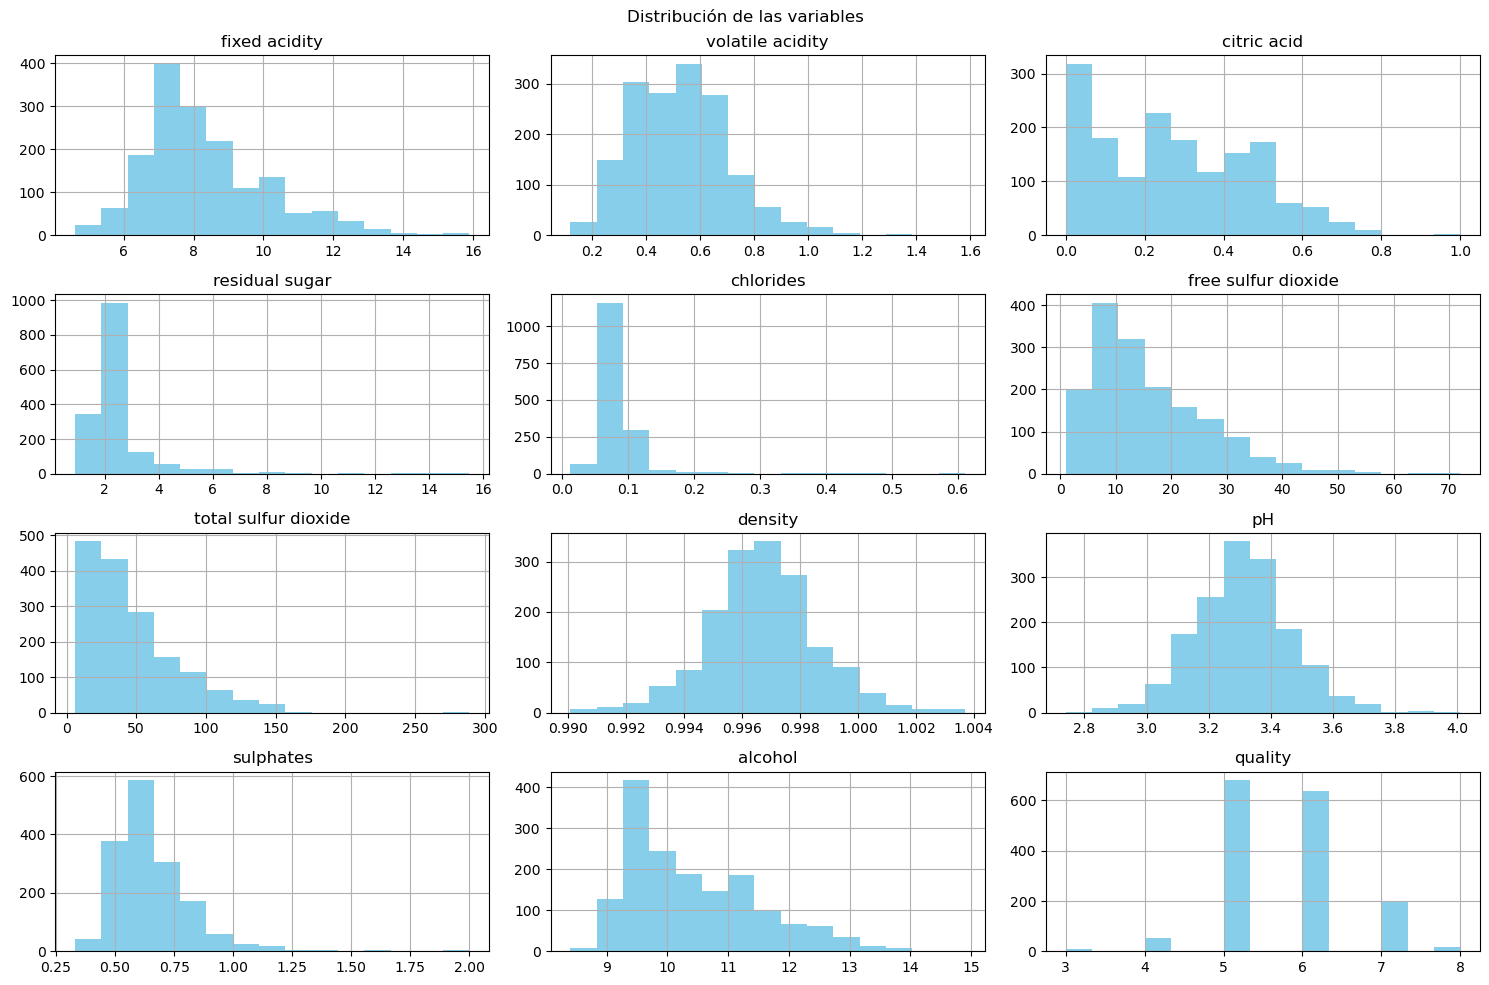

In [13]:

# Histograma por variable
data.hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribución de las variables")
plt.tight_layout()
plt.show()


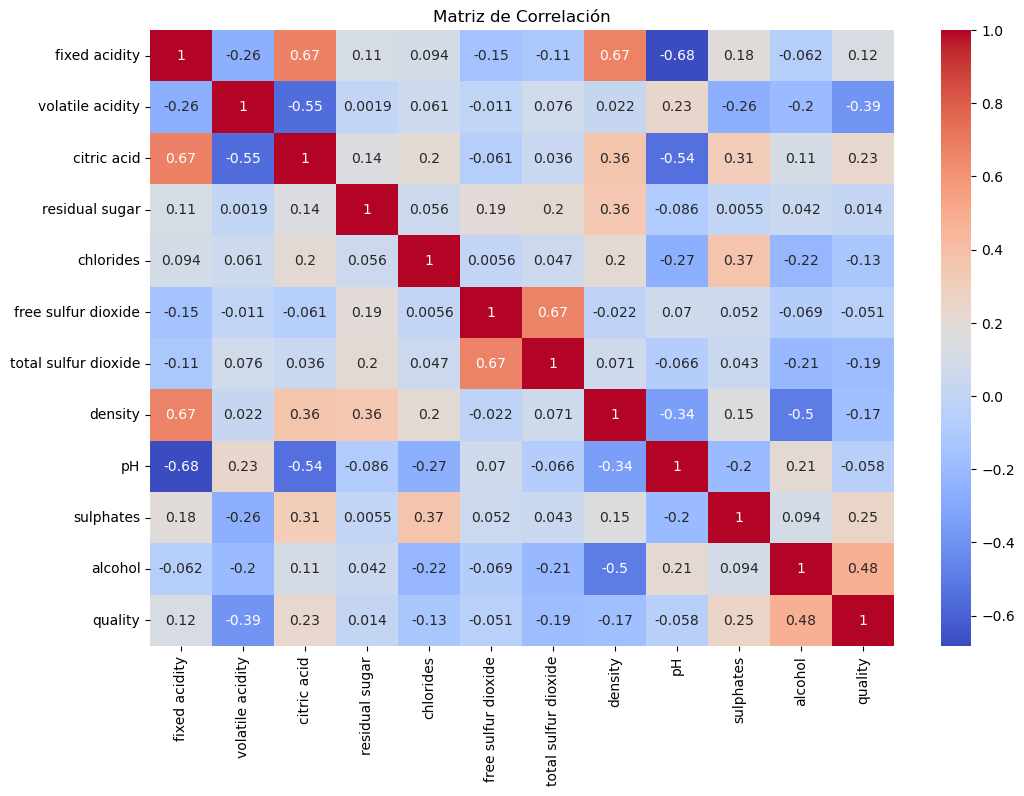

In [15]:

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [17]:

# 4. Transformar la variable objetivo (quality: 3 a 8)
def convertir_calidad(valor):
    if valor <= 4:
        return 0  # baja
    elif valor <= 6:
        return 1  # media
    else:
        return 2  # alta

data['quality_label'] = data['quality'].apply(convertir_calidad)



Distribución de clases (calidad):
1    1319
2     217
0      63
Name: quality_label, dtype: int64


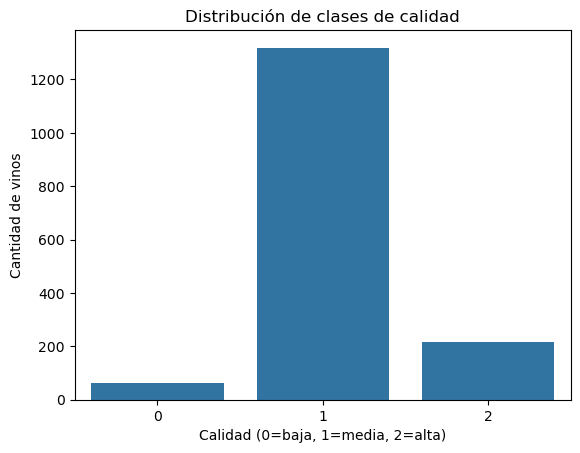

In [19]:

# Ver distribución de clases
print("\nDistribución de clases (calidad):")
print(data['quality_label'].value_counts())

sns.countplot(x='quality_label', data=data)
plt.title("Distribución de clases de calidad")
plt.xlabel("Calidad (0=baja, 1=media, 2=alta)")
plt.ylabel("Cantidad de vinos")
plt.show()


In [21]:

# 5. Preprocesamiento
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']


In [23]:

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [25]:
# 6. División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)



In [27]:
# 7. Entrenar el modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [29]:
# 8. Evaluación
y_pred = clf.predict(X_test)

print("\nMétricas del modelo:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

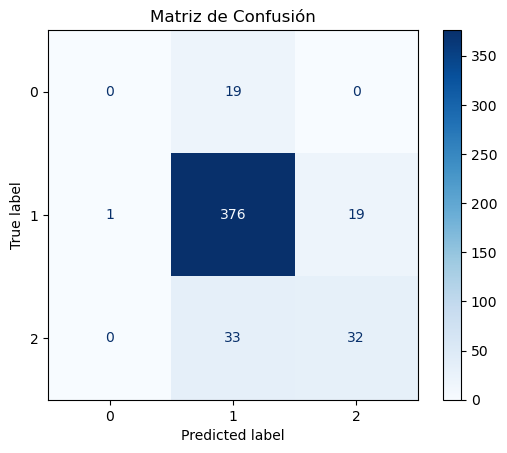

In [37]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

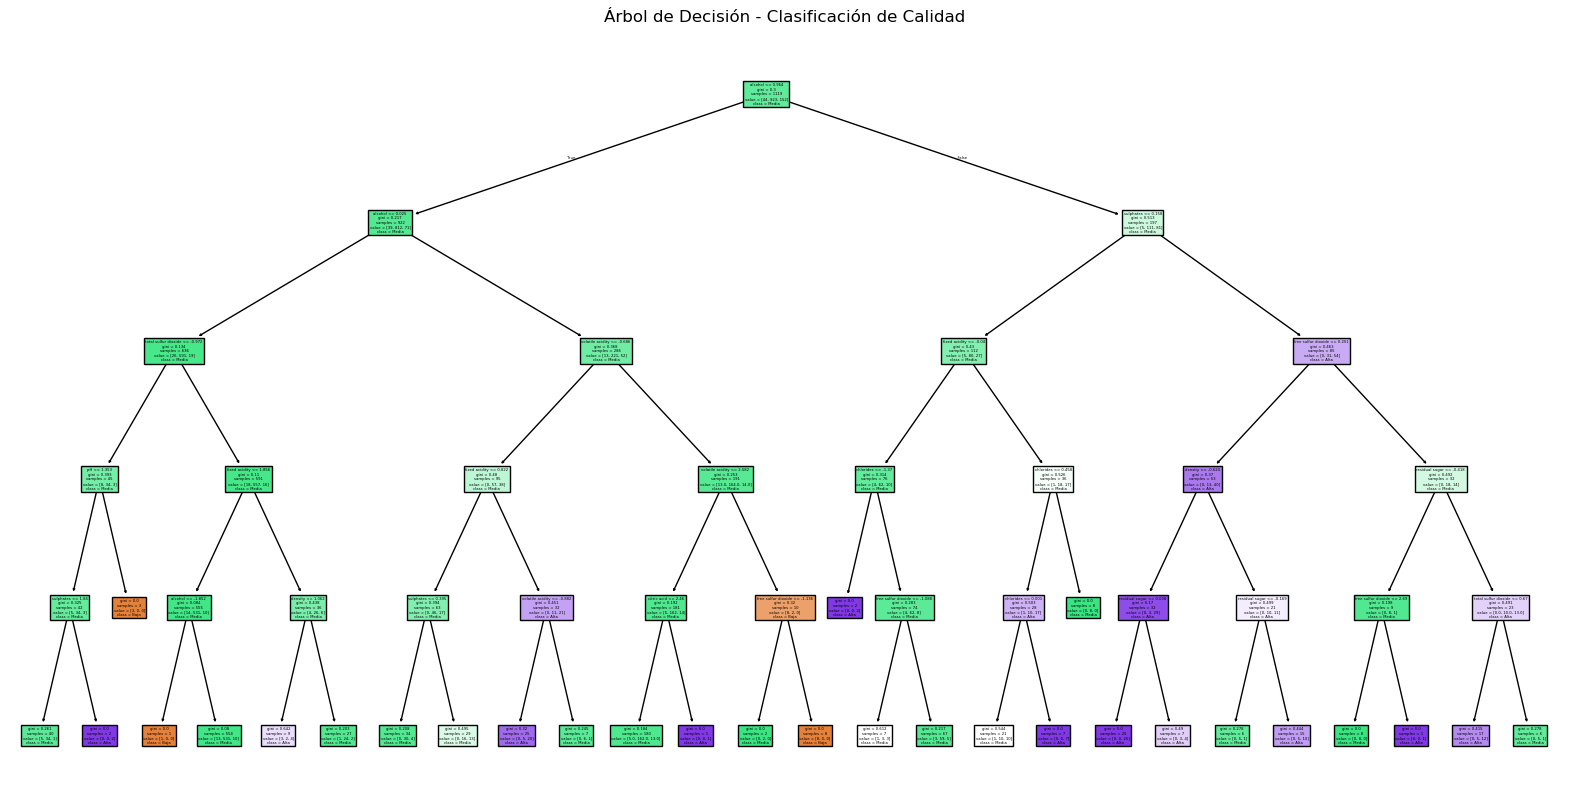

In [35]:
# 9. Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Baja", "Media", "Alta"], filled=True)
plt.title("Árbol de Decisión - Clasificación de Calidad")
plt.show()